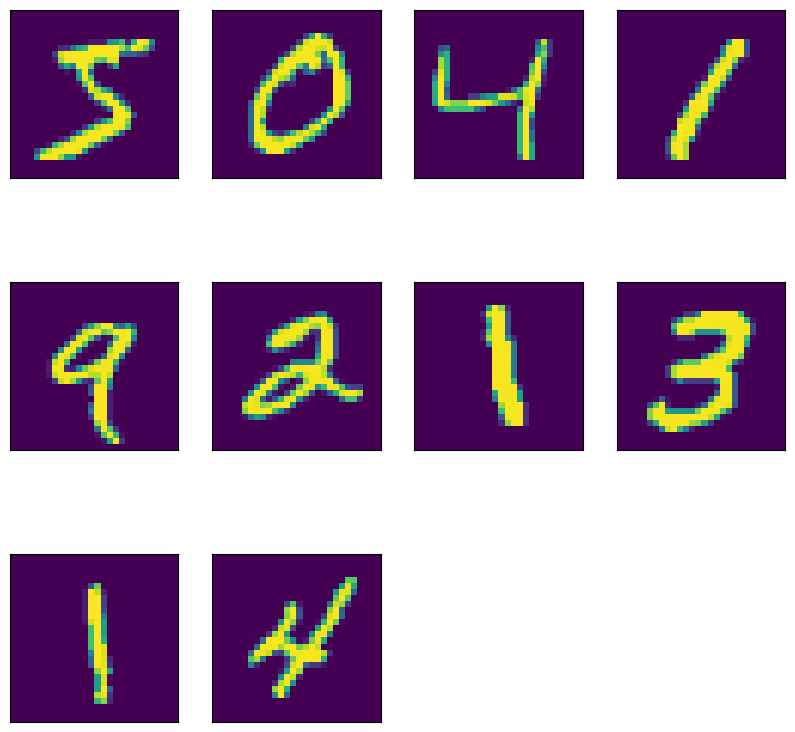

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()

f_image_train, f_image_test = f_image_train/255.0, f_image_test/255.0

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    # plt.xlabel(class_names[f_label_train[i]])
plt.show()
    

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(f_image_train, f_label_train, epochs=10, batch_size=10)
model.summary()
model.save('fashion_mnist.h5')


Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8917 - loss: 0.3610
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.9699 - loss: 0.0981
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9790 - loss: 0.0663
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9835 - loss: 0.0520
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9863 - loss: 0.0410
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9890 - loss: 0.0352
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9907 - loss: 0.0293
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9916 - loss: 0.0255
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9914 - loss: 0.0257
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9929 - loss: 0.0214


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (10, 784)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (10, 128)              │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (10, 64)               │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (10, 10)               │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,160 (1.25 MB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 218,774 (854.59 KB)

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


model = tf.keras.models.load_model('./fashion_mnist.h5')
mnist = tf.keras.datasets.mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = mnist.load_data()

f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

num = 10
predict = model.predict(f_image_test[:num])
print(f_label_test[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[7 2 1 0 4 1 4 9 5 9]
 * Prediction,  [7 2 1 0 4 1 4 9 5 9]
